In [327]:
import sys, os
from cProfile import label
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.constants import c
import importlib
import tools
import pandas as pd

In [328]:
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python')
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py')

In [329]:
warnings.filterwarnings("ignore", category=SyntaxWarning)
import lumapi

In [330]:
icApi = lumapi.INTERCONNECT()

In [361]:
icApi.switchtolayout()
icApi.deleteall()

In [362]:
#units
nm = 1e-9
um = 1e-6

In [363]:
#waveguide data
ng = 4.19088 #pdk
neff = 2.44553 #pdk
#bandwidth
wavelength_start = 1530*nm
wavelength_stop = 1565*nm
centralWl = (wavelength_start + wavelength_stop)/2


In [364]:
importlib.reload(tools)
FSR1 =1.6*nm

deltaLFS = centralWl/neff #eq (3)
deltaLbase = (centralWl)**2 / (2*FSR1*ng)
deltaLshifts2st = [0, 0.75*deltaLFS] # A B 
deltaLshifts1st = [0, 0.25*deltaLFS,0.125*deltaLFS,0.375*deltaLFS] #A B C D


L = 400*um
#deltaL = tools.getDeltaL(FSR, (wavelength_start+wavelength_stop)/2, ng)
deltaL = tools.getDeltaL(FSR1, centralWl, ng)

Lpi = tools.getLpi(centralWl, neff)

delayLengths = L + np.array([deltaLbase,2*deltaLbase,-2*deltaLbase +Lpi,-2*deltaLbase])

LC = np.array([18.89, 8.85, 8.5, 18.89,12.55])*um #4th order filter 
LC3rd = np.array([18.89, 11.1, 11.1,4.95])*um #3rd order filter
LC2nd = np.array([18.89, 13.7, 6.9])*um
LC1st = np.array([18.89,18.89])*um
#2*deltaL/um
delayLengths/um


array([578.56901847, 757.13803694,  43.17835664,  42.86196306])

In [365]:
icApi.switchtolayout()

In [366]:
importlib.reload(tools)
tools.placeOna(icApi,'ona1',1000,-200,8,1000,c/wavelength_start, c/wavelength_stop)

0

## 3 st

In [367]:
importlib.reload(tools)
tools.MZILatticefilterPDK(icApi, L,delayLengths, LC,'3 st',5)

0

## 2 st A

In [368]:
importlib.reload(tools)

deltaLbase2 = deltaLbase/2

Lpi = tools.getLpi((wavelength_start+wavelength_stop)/2, neff)

dl2stA = deltaLbase2 + deltaLshifts2st[0]
L = 400*um
delayLengths = L + np.array([dl2stA,2*dl2stA,(-2*dl2stA) +Lpi,-2*dl2stA])

dl2stA/um
delayLengths/um

array([489.28450923, 578.56901847, 221.74737511, 221.43098153])

In [369]:
importlib.reload(tools)
tools.MZILatticefilterPDK(icApi, L,delayLengths, LC2nd,'2 st A',3)

0

## 2 st B

In [370]:
importlib.reload(tools)
dl2stB = deltaLbase2 + deltaLshifts2st[1]
delayLengths = L + np.array([dl2stB,2*dl2stB,(-2*dl2stB) +Lpi,-2*dl2stB])
tools.MZILatticefilterPDK(icApi, L,delayLengths, LC2nd,'2 st B',3)

0

## 1 st A

In [371]:
importlib.reload(tools)

deltaLbase3 = deltaLbase/4

dl1stA = deltaLbase3 + deltaLshifts1st[0]

Lpi = tools.getLpi((wavelength_start+wavelength_stop)/2, neff)

delayLengths = L + np.array([dl1stA,2*dl1stA,(-2*dl1stA) +Lpi,-2*dl1stA])

delayLengths/um

array([444.64225462, 489.28450923, 311.03188435, 310.71549077])

In [372]:
icApi.switchtolayout()
importlib.reload(tools)
icApi.refresh()
tools.MZILatticefilterPDK(icApi, L,delayLengths, LC2nd,'1 st A',3)

0

## 1 st B

In [373]:
importlib.reload(tools)

deltaLbase3 = deltaLbase/4

dl1stB = deltaLbase3 + deltaLshifts1st[1]

Lpi = tools.getLpi((wavelength_start+wavelength_stop)/2, neff)

delayLengths = L + np.array([dl1stB,2*dl1stB,(-2*dl1stB) +Lpi,-2*dl1stB])

delayLengths/um

array([444.80045141, 489.60090282, 310.71549077, 310.39909718])

In [374]:
icApi.switchtolayout()
importlib.reload(tools)
icApi.refresh()
tools.MZILatticefilterPDK(icApi, L,delayLengths, LC2nd,'1 st B',3)

0

##  1 st C

In [375]:
importlib.reload(tools)

deltaLbase3 = deltaLbase/4

dl1stC = deltaLbase3 + deltaLshifts1st[2]

Lpi = tools.getLpi((wavelength_start+wavelength_stop)/2, neff)

delayLengths = L + np.array([dl1stC,2*dl1stC,(-2*dl1stC) +Lpi,-2*dl1stC])

delayLengths/um

array([444.72135301, 489.44270603, 310.87368756, 310.55729397])

In [376]:
icApi.switchtolayout()
importlib.reload(tools)
icApi.refresh()
tools.MZILatticefilterPDK(icApi, L,delayLengths, LC2nd,'1 st C',3)

0

##  1 st D

In [377]:
importlib.reload(tools)

deltaLbase3 = deltaLbase/4

dl1stD = deltaLbase3 + deltaLshifts1st[3]

Lpi = tools.getLpi((wavelength_start+wavelength_stop)/2, neff)

delayLengths = L + np.array([dl1stD,2*dl1stD,(-2*dl1stD) +Lpi,-2*dl1stD])

#deltaLbase3/um
delayLengths/um

array([444.87954981, 489.75909961, 310.55729397, 310.24090039])

In [378]:
icApi.switchtolayout()
importlib.reload(tools)
icApi.refresh()
tools.MZILatticefilterPDK(icApi, L,delayLengths, LC2nd,'1 st D',3)

0

## Positioning devices

In [379]:
icApi.refresh()
#positioning compounds
icApi.setposition('3 st', 700, 100)
icApi.setposition('2 st A', 900, -10)
icApi.setposition('2 st B', 900, 200)
icApi.setposition('1 st A', 1200, -60)
icApi.setposition('1 st B', 1200, 40)
icApi.setposition('1 st C', 1200, 150)
icApi.setposition('1 st D', 1200, 250)

## Connections

In [380]:
icApi.connect('3 st', 'port 1', 'ona1', 'output')

icApi.connect('3 st', 'port 3', '2 st A', 'port 2')
icApi.connect('3 st', 'port 4', '2 st B', 'port 1')

icApi.connect('2 st A', 'port 3', '1 st A', 'port 2')
icApi.connect('2 st A', 'port 4', '1 st B', 'port 1')

icApi.connect('2 st B', 'port 3', '1 st C', 'port 2')
icApi.connect('2 st B', 'port 4', '1 st D', 'port 1')

#outputs to ona
icApi.connect('1 st A', 'port 3', 'ona1', 'input 1')
icApi.connect('1 st A', 'port 4', 'ona1', 'input 2')
icApi.connect('1 st B', 'port 3', 'ona1', 'input 3')
icApi.connect('1 st B', 'port 4', 'ona1', 'input 4')
icApi.connect('1 st C', 'port 3', 'ona1', 'input 5')
icApi.connect('1 st C', 'port 4', 'ona1', 'input 6')
icApi.connect('1 st D', 'port 3', 'ona1', 'input 7')
icApi.connect('1 st D', 'port 4', 'ona1', 'input 8')


1.0

In [381]:
icApi.run()

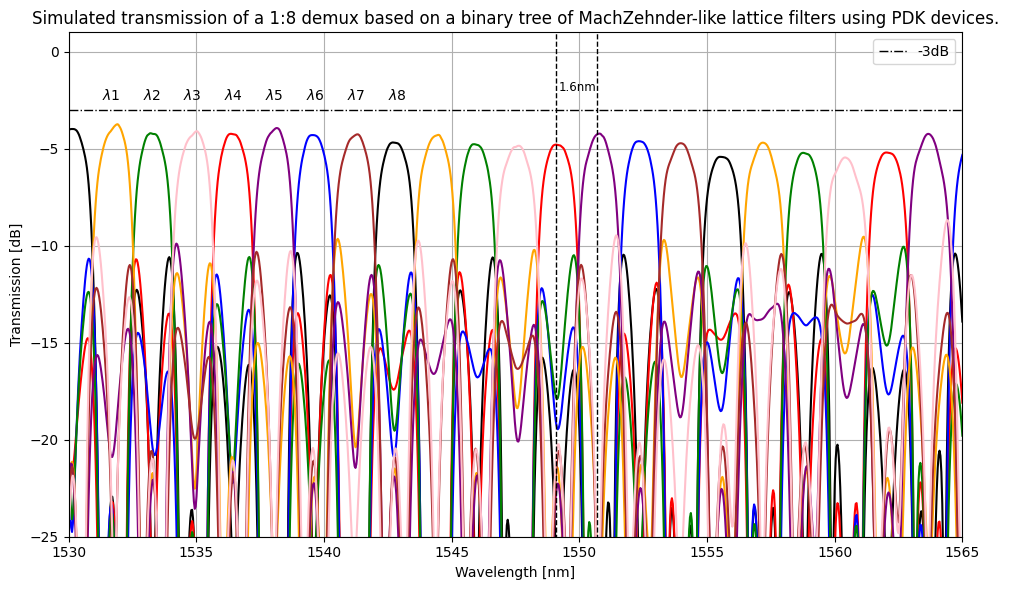

In [383]:
outputsOna = [
    'input 1/mode 1/gain',
    'input 2/mode 1/gain',
    'input 3/mode 1/gain',
    'input 4/mode 1/gain',
    'input 5/mode 1/gain',
    'input 6/mode 1/gain',
    'input 7/mode 1/gain',
    'input 8/mode 1/gain'
]

colors = ['black', 'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']
labels = [rf'$\lambda${i+1}' for i in range(8)]


plt.figure(figsize=(10,6))
for i, path in enumerate(outputsOna):
    data = icApi.getresult('ona1', path)
    plt.plot(data['wavelength']/nm, data["'TE' gain (dB)"], color=colors[i])
plt.vlines(1550.7, ymin=-60, ymax=1, color='black', linewidth=1, linestyles='--')
plt.vlines(1549.1, ymin=-60, ymax=1, color='black', linewidth=1, linestyles='--')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.xlim(wavelength_start/nm, wavelength_stop/nm)
plt.ylim(-25, 1)
#plt.legend()
k = 0
for i in range(8):
    plt.text(1531.3+k, -2.5,rf'$\lambda${i+1}')
    k+= 1.6
plt.text(1549.2, -2, '1.6nm', fontsize=8.5)
plt.hlines(-3, xmin=1530, xmax=1565, color='black', linewidth=1, linestyles='-.', label='-3dB')
plt.legend()
plt.grid(True)
plt.title('Simulated transmission of a 1:8 demux based on a binary tree of MachZehnder-like lattice filters using PDK devices.')
plt.tight_layout()
plt.savefig('TransmissionPDK_filtros_diferentes.png', dpi=300)

## Comparing with 1st order only filter to see loss

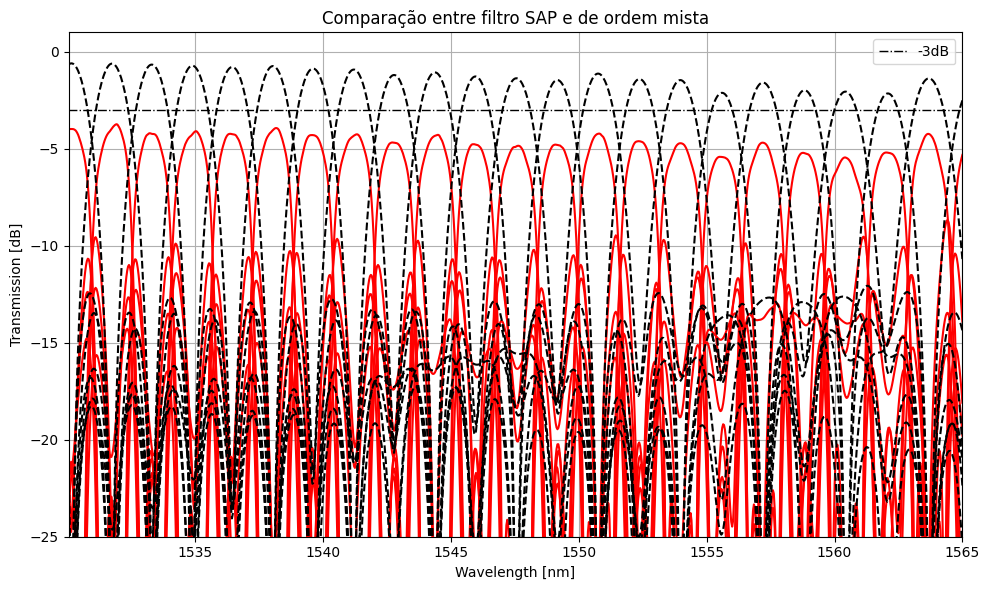

In [386]:
df = pd.read_csv('dados_ona_1st_orderFilters.csv')
plt.figure(figsize=(10,6))

for i, path in enumerate(outputsOna):
    data = icApi.getresult('ona1', path)
    plt.plot(data['wavelength']/nm, data["'TE' gain (dB)"], color='red')
for i in range(8):
    plt.plot(df['wavelength'].values,
             df[f'gain_port_{i+1}'].values,
             color='black',
             linestyle='--')
plt.xlabel('Wavelength [nm]')
#plt.legend()
plt.ylabel('Transmission [dB]')
plt.xlim(df['wavelength'].min(), df['wavelength'].max())
plt.ylim(-25, 1)
plt.grid(True)
plt.title('Comparação entre filtro SAP e de ordem mista')
plt.hlines(-3, xmin=1530, xmax=1565, color='black', linewidth=1, linestyles='-.', label='-3dB')
plt.legend()
plt.tight_layout()
plt.savefig('comparacao.png', dpi=300)
plt.show()